In [1]:
# Exploratory Data Analysis

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Understanding the Basic Structure

In [5]:
df = pd.read_csv('ms_iba/resources/2020_Yellow_Taxi_Trip_Data.csv')

/tmp/ipykernel_6803/3565782525.py:1: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ms_iba/resources/2020_Yellow_Taxi_Trip_Data.csv')


In [6]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238.0,239.0,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239.0,238.0,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238.0,238.0,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238.0,151.0,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193.0,193.0,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,01/01/2020 12:09:44 AM,01/01/2020 12:10:37 AM,1.0,0.03,1.0,N,7.0,193.0,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,01/01/2020 12:39:25 AM,01/01/2020 12:39:29 AM,1.0,0.00,1.0,N,193.0,193.0,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,12/18/2019 03:27:49 PM,12/18/2019 03:28:59 PM,1.0,0.00,5.0,N,193.0,193.0,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,12/18/2019 03:30:35 PM,12/18/2019 03:31:35 PM,4.0,0.00,1.0,N,193.0,193.0,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,01/01/2020 12:29:01 AM,01/01/2020 12:40:28 AM,2.0,0.70,1.0,N,246.0,48.0,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


In [7]:
# df[800000:801000].to_csv('ms_iba/resources/inference7.csv')

In [16]:
df['RatecodeID'].unique()

array([ 1.,  5.,  3.,  2.,  4., 99., nan,  6.])

In [7]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [8]:
df.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7.193488e+06,7.274529e+06,7.193488e+06,7.274529e+06,7.274529e+06,7.193488e+06,7.274529e+06,7.274529e+06,7.274529e+06,7.274529e+06,7.274529e+06,7.274529e+06,7.274529e+06,7.274529e+06
mean,1.514895e+00,2.932825e+00,1.059705e+00,1.646235e+02,1.626694e+02,1.268827e+00,1.269001e+01,1.103587e+00,4.925058e-01,2.187813e+00,3.464867e-01,2.979825e-01,1.864447e+01,2.275148e+00
std,1.151679e+00,7.931551e+01,8.196029e-01,6.565547e+01,6.994968e+01,4.733203e-01,1.212585e+01,1.256222e+00,7.300373e-02,2.739345e+00,1.745172e+00,3.389463e-02,1.472631e+01,7.360575e-01
min,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,9.700000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.940000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274534 entries, 0 to 7274533
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), object(4)
memory usage: 999.0+ MB


In [10]:
len(df)

7274534

In [11]:
def load_data(filepath):
    """ Load the dataset from a CSV file """
    return pd.read_csv(filepath)

def display_basic_info(df):
    """ Display the first few rows, describe the dataset, and show datatype information """
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nData Types and Missing Values:")
    print(df.info())

In [12]:
def summarize_missing_values(df):
    """ Calculate and print the percentage of missing values per column """
    missing_data = df.isnull().mean() * 100
    print("Percentage of missing data per column:")
    print(missing_data[missing_data > 0].sort_values(ascending=False))

In [13]:
summarize_missing_values(df)

Percentage of missing data per column:
payment_type             1.114106
RatecodeID               1.114106
store_and_fwd_flag       1.114106
passenger_count          1.114106
VendorID                 1.114037
trip_distance            0.000069
PULocationID             0.000069
DOLocationID             0.000069
fare_amount              0.000069
extra                    0.000069
mta_tax                  0.000069
tip_amount               0.000069
tolls_amount             0.000069
improvement_surcharge    0.000069
total_amount             0.000069
congestion_surcharge     0.000069
tpep_dropoff_datetime    0.000055
tpep_pickup_datetime     0.000055
dtype: float64


In [14]:
# Cleaning Data

In [15]:
df_copy = df

In [16]:
df[df['fare_amount'].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
7274529,2,02/05/2020 09:10:18 AM,02/05/2020 09{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7274530,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7274531,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7274532,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7274533,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def handle_missing_values(df, strategy='drop', columns=None):
    """
    Handle missing values in the DataFrame.
    :param df: DataFrame to clean.
    :param strategy: 'drop' to drop rows with missing values, 'fill' to fill them.
    :param columns: Specific columns to apply filling strategy if strategy is 'fill'.
    :returns: DataFrame with handled missing values.
    """
    if strategy == 'drop':
        return df.dropna()
    elif strategy == 'fill':
        for column in columns:
            if df[column].dtype == 'float64' or df[column].dtype == 'int64':
                df[column] = df[column].fillna(df[column].median())
            else:
                df[column] = df[column].fillna(df[column].mode()[0])
        return df

In [18]:
def correct_data_types(df):
    """
    Correct the data types in the DataFrame by specifying the date format.
    This assumes the datetime format is 'MM/DD/YYYY HH:MI:SS AM/PM'.
    """
    datetime_format = '%m/%d/%Y %I:%M:%S %p'  # Adjust the format if different
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format=datetime_format, errors='coerce')
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format=datetime_format, errors='coerce')
    return df

In [19]:
def remove_duplicates(df):
    """
    Remove duplicate rows from the DataFrame.
    """
    return df.drop_duplicates()

In [20]:
df = handle_missing_values(df, strategy='drop', columns=None)
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238.0,239.0,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239.0,238.0,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238.0,238.0,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238.0,151.0,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193.0,193.0,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,01/01/2020 12:09:44 AM,01/01/2020 12:10:37 AM,1.0,0.03,1.0,N,7.0,193.0,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,01/01/2020 12:39:25 AM,01/01/2020 12:39:29 AM,1.0,0.00,1.0,N,193.0,193.0,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,12/18/2019 03:27:49 PM,12/18/2019 03:28:59 PM,1.0,0.00,5.0,N,193.0,193.0,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,12/18/2019 03:30:35 PM,12/18/2019 03:31:35 PM,4.0,0.00,1.0,N,193.0,193.0,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,01/01/2020 12:29:01 AM,01/01/2020 12:40:28 AM,2.0,0.70,1.0,N,246.0,48.0,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


In [21]:
df = correct_data_types(df)


/tmp/ipykernel_6803/3348798581.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format=datetime_format, errors='coerce')
/tmp/ipykernel_6803/3348798581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format=datetime_format, errors='coerce')


In [22]:
len(df)

7193488

In [23]:
df.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                    float64
DOLocationID                    float64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [24]:
df=remove_duplicates(df)
len(df)

7193488

In [25]:
# Visualizing Data

In [36]:
def plot_iqr(df):
    """
    Plot the box plots for each numeric column in the DataFrame to visualize the IQR.
    :param df: DataFrame from which to plot IQR.
    """
    numeric_cols = df.select_dtypes(include=[np.number])  # Select only numeric columns
    num_of_cols = len(numeric_cols.columns)
    
    fig, axs = plt.subplots(num_of_cols, figsize=(10, num_of_cols * 5))  # Adjust size accordingly
    
    if num_of_cols == 1:
        axs = [axs]  # Ensure axs is iterable even for a single numeric column
    
    for ax, col in zip(axs, numeric_cols):
        sns.boxplot(x=numeric_cols[col], ax=ax)
        ax.set_title(f'Box plot of {col}', fontsize=15)
        ax.set_xlabel(col, fontsize=12)
        
    plt.tight_layout()
    plt.show()


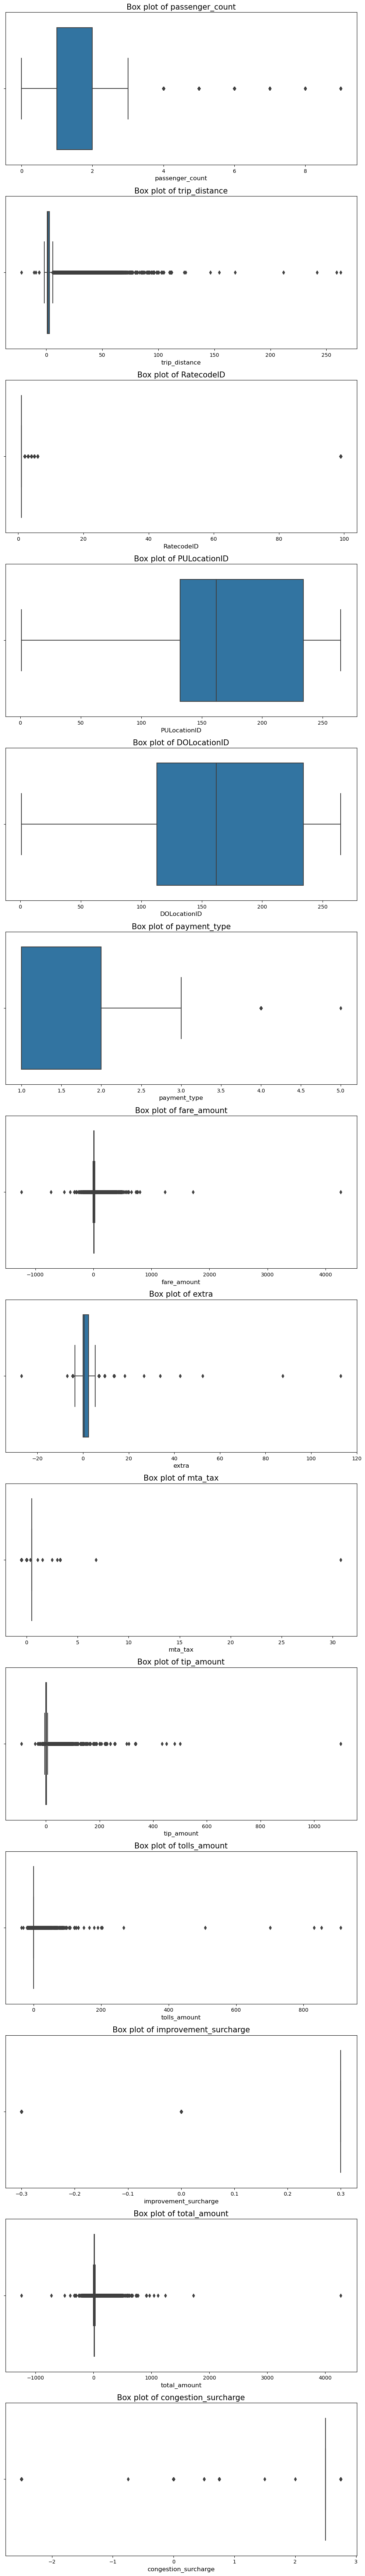

In [37]:
plot_iqr(df)

In [23]:
def plot_distributions(df):
    """
    Plot histograms and KDEs for each numeric column in the DataFrame.
    :param df: DataFrame from which to plot distributions.
    """
    numeric_cols = df.select_dtypes(include=[np.number])  # Select only numeric columns
    num_of_cols = len(numeric_cols.columns)
    
    # Set up the matplotlib figure
    fig, axs = plt.subplots(num_of_cols, 2, figsize=(12, num_of_cols * 5))
    
    if num_of_cols == 1:  # Adjust if there's only one numeric column
        axs = [axs]
    
    for i, col in enumerate(numeric_cols):
        # Histogram
        sns.histplot(numeric_cols[col], kde=False, ax=axs[i][0])
        axs[i][0].set_title(f'Histogram of {col}', fontsize=15)
        axs[i][0].set_xlabel(col, fontsize=12)
        axs[i][0].set_ylabel('Frequency', fontsize=12)
        
        # Kernel Density Estimate Plot
        sns.histplot(numeric_cols[col], kde=True, stat="density", linewidth=0, ax=axs[i][1])
        axs[i][1].set_title(f'KDE of {col}', fontsize=15)
        axs[i][1].set_xlabel(col, fontsize=12)
        axs[i][1].set_ylabel('Density', fontsize=12)
    
    plt.tight_layout()
    plt.show()

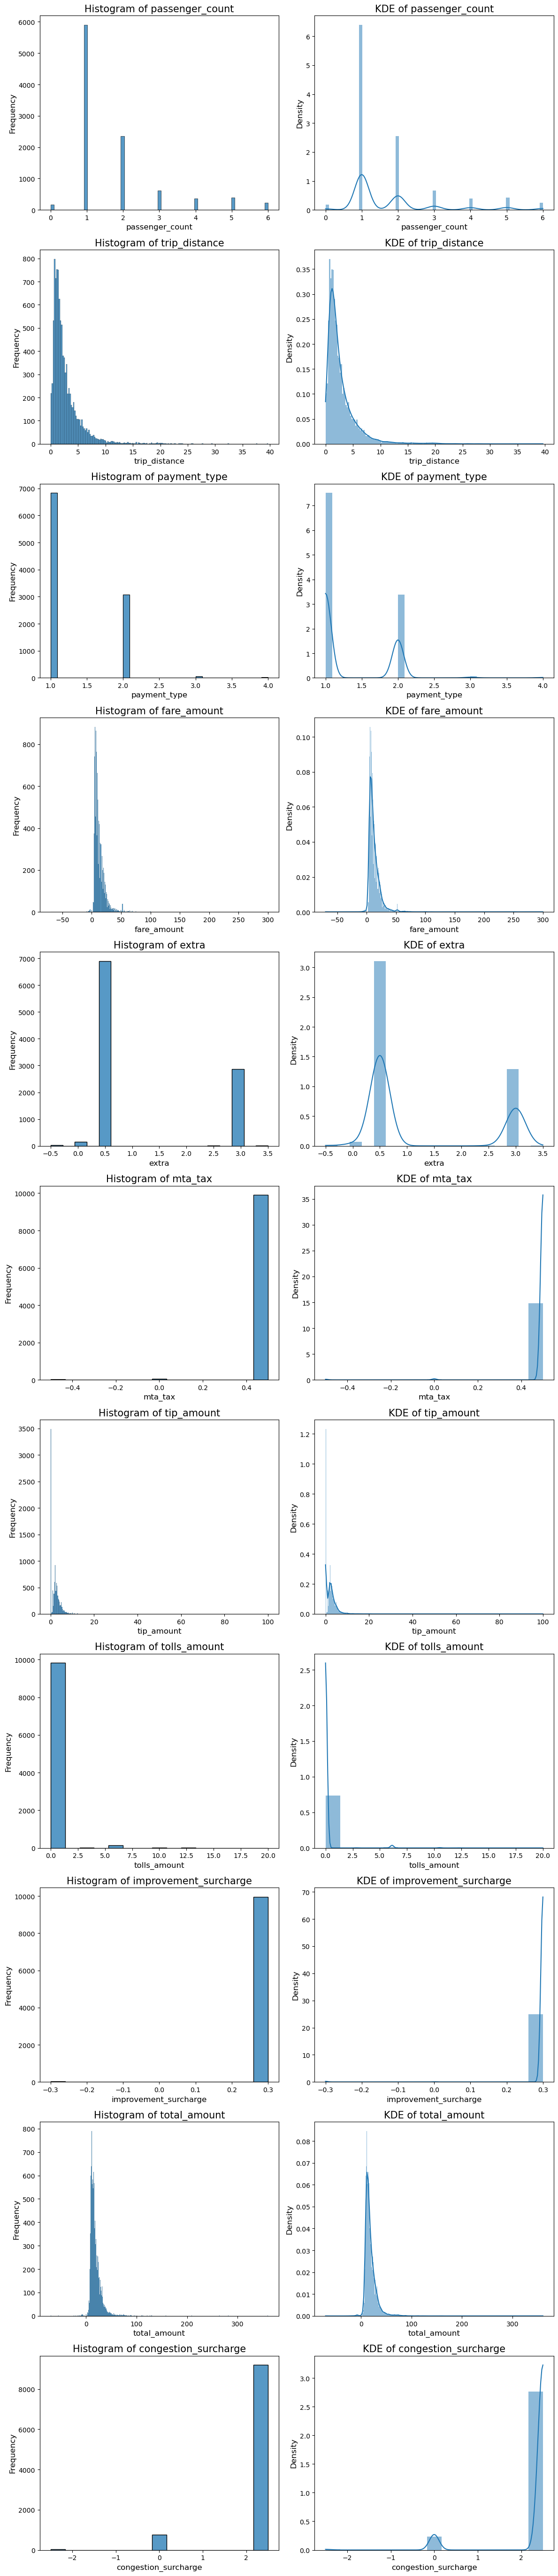

In [26]:
plot_distributions(df[['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge']][:10000])

In [38]:
def sanity_checks(df):
    # Define conditions for rows to be removed
    conditions = (
        (df['passenger_count'] == 0) |
        (df['trip_distance'] == 0) |
        (df['fare_amount'] < 0) |
        (df['total_amount'] < 0)
    )
    
    # Invert conditions to keep rows that do not meet any of the above conditions
    df_cleaned = df[~conditions]
    
    # Display the cleaned DataFrame
    return df_cleaned

In [39]:
df = sanity_checks(df)

In [40]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [41]:
# Removing Outliers

In [42]:
def identify_outlier_columns(df, columns):
    """
    Identify columns that contain outliers.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of columns to check for outliers.

    Returns:
    list: List of columns that contain outliers.
    """
    outlier_columns = []  # List to store columns which contain outliers
    
    for column in columns:
        if column in df.columns and df[column].dtype in ['int64', 'float64']:  # Ensure the column has numeric data
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Check if there are any outliers
            if ((df[column] < lower_bound) | (df[column] > upper_bound)).any():
                outlier_columns.append(column)

    return outlier_columns


In [43]:
outlier_columns = identify_outlier_columns(df, df.columns)

print("Columns with outliers:", outlier_columns)

Columns with outliers: ['passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


In [44]:
def remove_outliers_zscore(df, columns, threshold=3):
    """
    Remove outliers from specified columns in the DataFrame using Z-score method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of columns to check for outliers.
    threshold (float): The Z-score threshold to identify outliers.

    Returns:
    pd.DataFrame: DataFrame with outliers removed from specified columns.
    list: List of columns that had outliers.
    """
    outlier_columns = []  # List to store columns which contain outliers
    clean_df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    
    for column in columns:
        if column in df.columns and df[column].dtype in ['int64', 'float64']:  # Ensure the column has numeric data
            z_scores = np.abs(stats.zscore(df[column]))
            
            # Check if there are any outliers
            if (z_scores > threshold).any():
                outlier_columns.append(column)
            
            # Remove rows with outliers in the current column
            clean_df = clean_df[z_scores <= threshold]

    return clean_df, outlier_columns

In [ ]:
clean_df1, outlier_columns = remove_outliers_zscore(df, df.columns)

/tmp/ipykernel_8917/3754906369.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[z_scores <= threshold]


In [ ]:
clean_df1

In [ ]:
clean_df1['RatecodeID'].unique()

In [ ]:
import pandas as pd

def remove_outliers(df):
    outlier_columns = []  # List to store columns which contain outliers
    clean_df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original data
    
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Ensure the column has numeric data
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Before removing, check if there are any outliers
            if ((df[column] < lower_bound) | (df[column] > upper_bound)).any():
                outlier_columns.append(column)
            
            # Condition to identify rows with outliers
            condition = (df[column] >= lower_bound) & (df[column] <= upper_bound)
            clean_df = clean_df[condition]

    return clean_df, outlier_columns


In [ ]:
df, columns_with_outliers = remove_outliers(df)

# print("Cleaned DataFrame:\n", clean_df)
# print("Columns with outliers:", columns_with_outliers)

In [ ]:
def remove_outliers_iqr(df, column):
    """
    Remove outliers using the Interquartile Range (IQR) method.
    :param df: DataFrame from which to remove outliers.
    :param column: Column in which to look for outliers.
    :returns: DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
def cap_outliers(df, column, method='iqr', factor=1.5):
    """
    Cap outliers at a certain threshold defined by IQR or standard deviation.
    :param df: DataFrame in which to cap outliers.
    :param column: Column in which to cap outliers.
    :param method: Method to use for calculating threshold ('iqr' or 'std').
    :param factor: Multiplier for IQR or standard deviation to define bounds.
    :returns: DataFrame with outliers capped.
    """
    if method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
    elif method == 'std':
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - factor * std
        upper_bound = mean + factor * std
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [ ]:
def remove_outliers_z_score(df, column, threshold=3):
    """
    Remove outliers using the Z-score method.
    :param df: DataFrame from which to remove outliers.
    :param column: Column in which to look for outliers.
    :param threshold: Z-score threshold to identify an outlier.
    :returns: DataFrame with outliers removed.
    """
    z_scores = np.abs(stats.zscore(df[column], nan_policy='omit'))
    return df[z_scores < threshold]

In [ ]:
# Remove outliers from 'fare_amount' using IQR
remove_outliers_iqr(df, 'fare_amount')

In [ ]:
remove_outliers_z_score(df, 'fare_amount')

In [ ]:
cap_outliers(df, 'fare_amount', method='std')

In [26]:
len(df)

7193488

In [45]:
# Feature Engineering

In [27]:
def extract_time_features(df):
    """
    Extract time-based features from the datetime columns.
    :param df: DataFrame containing 'tpep_pickup_datetime' and 'tpep_dropoff_datetime'.
    :returns: DataFrame with new time-based features.
    """
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
    
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0  # duration in minutes
    return df

def calculate_distance_rate(df):
    """
    Calculate the rate of fare per mile.
    :param df: DataFrame with 'trip_distance' and 'fare_amount' columns.
    :returns: DataFrame with new distance rate feature.
    """
    df['fare_per_mile'] = df.apply(lambda x: x['fare_amount'] / x['trip_distance'] if x['trip_distance'] != 0 else 0, axis=1)
    return df

# def encode_categorical_features(df, columns):
#     """
#     One-hot encode categorical features.
#     :param df: DataFrame with categorical columnsend_date.
#     :param columns: List of column names to be encoded.
#     :returns: DataFrame with one-hot encoded features.
#     """
#     return pd.get_dummies(df, columns=columns)

def feature_engineering_pipeline(df):
    """
    A pipeline function that applies all feature engineering functions.
    :param df: DataFrame to be processed.
    :returns: DataFrame with all features engineered.
    """
    df = extract_time_features(df)
    df = calculate_distance_rate(df)
    # df = encode_categorical_features(df, ['pickup_day_of_week', 'payment_type'])
    return df

In [28]:
def process_in_chunks(df, chunk_size=50000):
    """
    Process the DataFrame in chunks and apply feature engineering.
    :param df: DataFrame to be processed.
    :param chunk_size: Number of rows per chunk.
    :returns: DataFrame with all features engineered concatenated from all chunks.
    """
    # Calculate the number of chunks
    num_chunks = int(np.ceil(len(df) / chunk_size))
    
    # Split the DataFrame into chunks
    chunks = np.array_split(df, num_chunks)
    
    # List to store each chunk after processing
    chunk_list = []
    
    # Process each chunk
    for chunk in chunks:
        chunk_processed = feature_engineering_pipeline(chunk)
        chunk_list.append(chunk_processed)
    
    # Concatenate all processed chunks into a single DataFrame
    return pd.concat(chunk_list, ignore_index=True)

In [29]:
engineered_data = process_in_chunks(df, chunk_size=50000)

In [30]:
engineered_data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day_of_week,pickup_month,trip_duration,fare_per_mile
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,...,1.47,0.0,0.3,11.27,2.5,0,Wednesday,1,4.800000,5.000000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,...,1.50,0.0,0.3,12.30,2.5,0,Wednesday,1,7.416667,5.833333


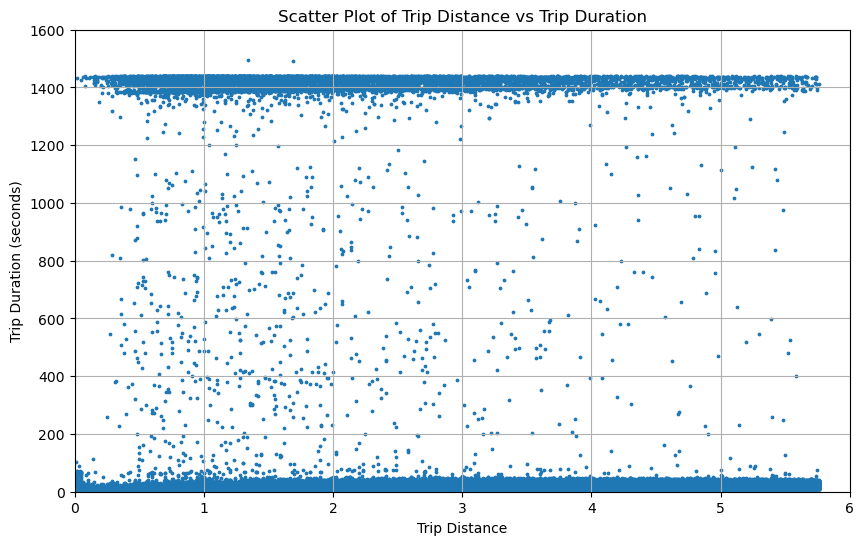

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(
    x=engineered_data["trip_distance"],
    y=engineered_data["trip_duration"],
    s=3  # sets the marker size
)
plt.xlim(0, 6)  # Limiting x-axis range
plt.ylim(0, 800 * 2)  # Limiting y-axis range
plt.xlabel("Trip Distance")
plt.ylabel("Trip Duration (seconds)")
plt.title("Scatter Plot of Trip Distance vs Trip Duration")
plt.grid(True)  # Adds a grid
plt.show()

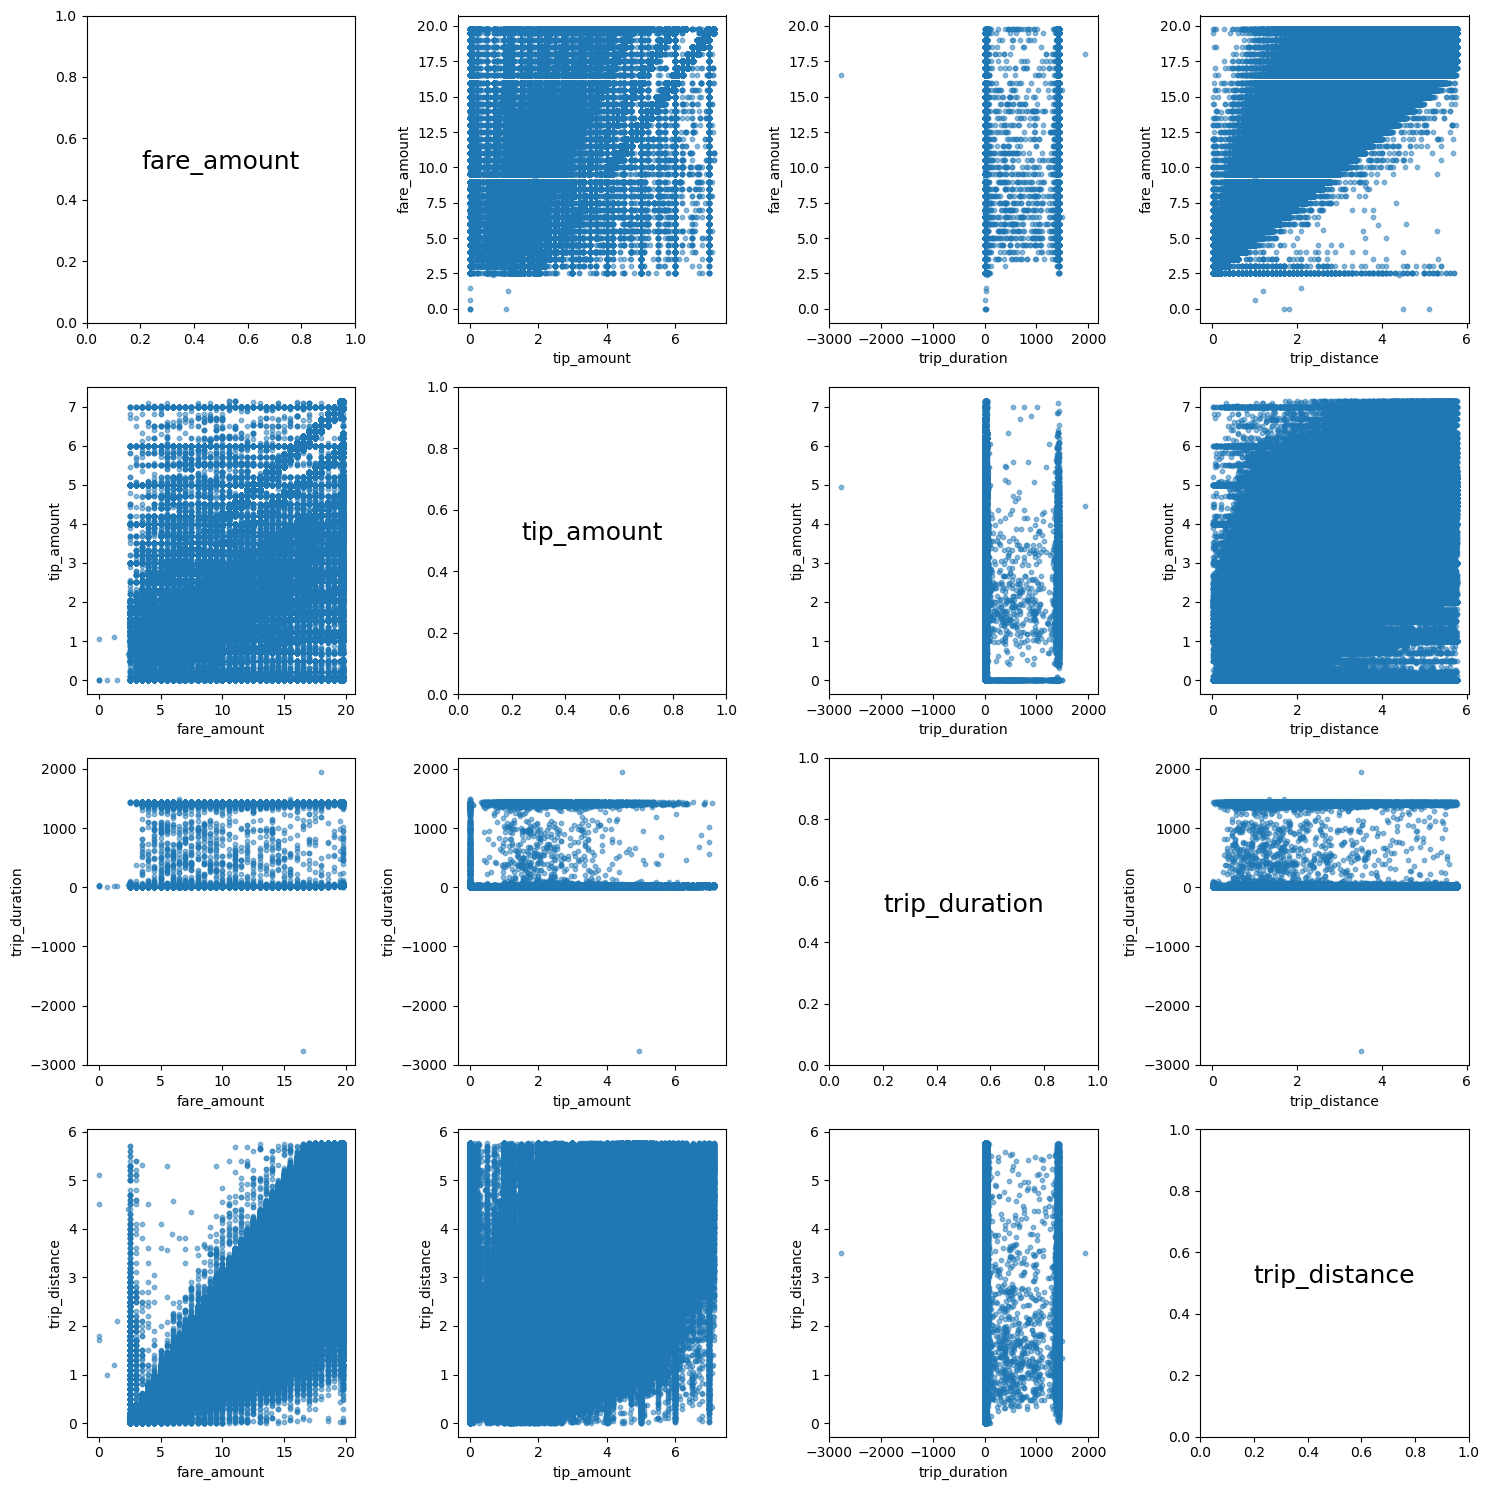

In [74]:
variables = ['fare_amount', 'tip_amount', 'trip_duration', 'trip_distance']
n_vars = len(variables)

fig, axs = plt.subplots(n_vars, n_vars, figsize=(15, 15))  # Create a grid of subplots

for i in range(n_vars):
    for j in range(n_vars):
        if i != j:
            axs[i, j].scatter(engineered_data[variables[j]], engineered_data[variables[i]], alpha=0.5, s=10)
            axs[i, j].set_xlabel(variables[j])
            axs[i, j].set_ylabel(variables[i])
        else:
            axs[i, j].text(0.5, 0.5, variables[i], fontsize=18, ha='center')

plt.tight_layout()
plt.show()

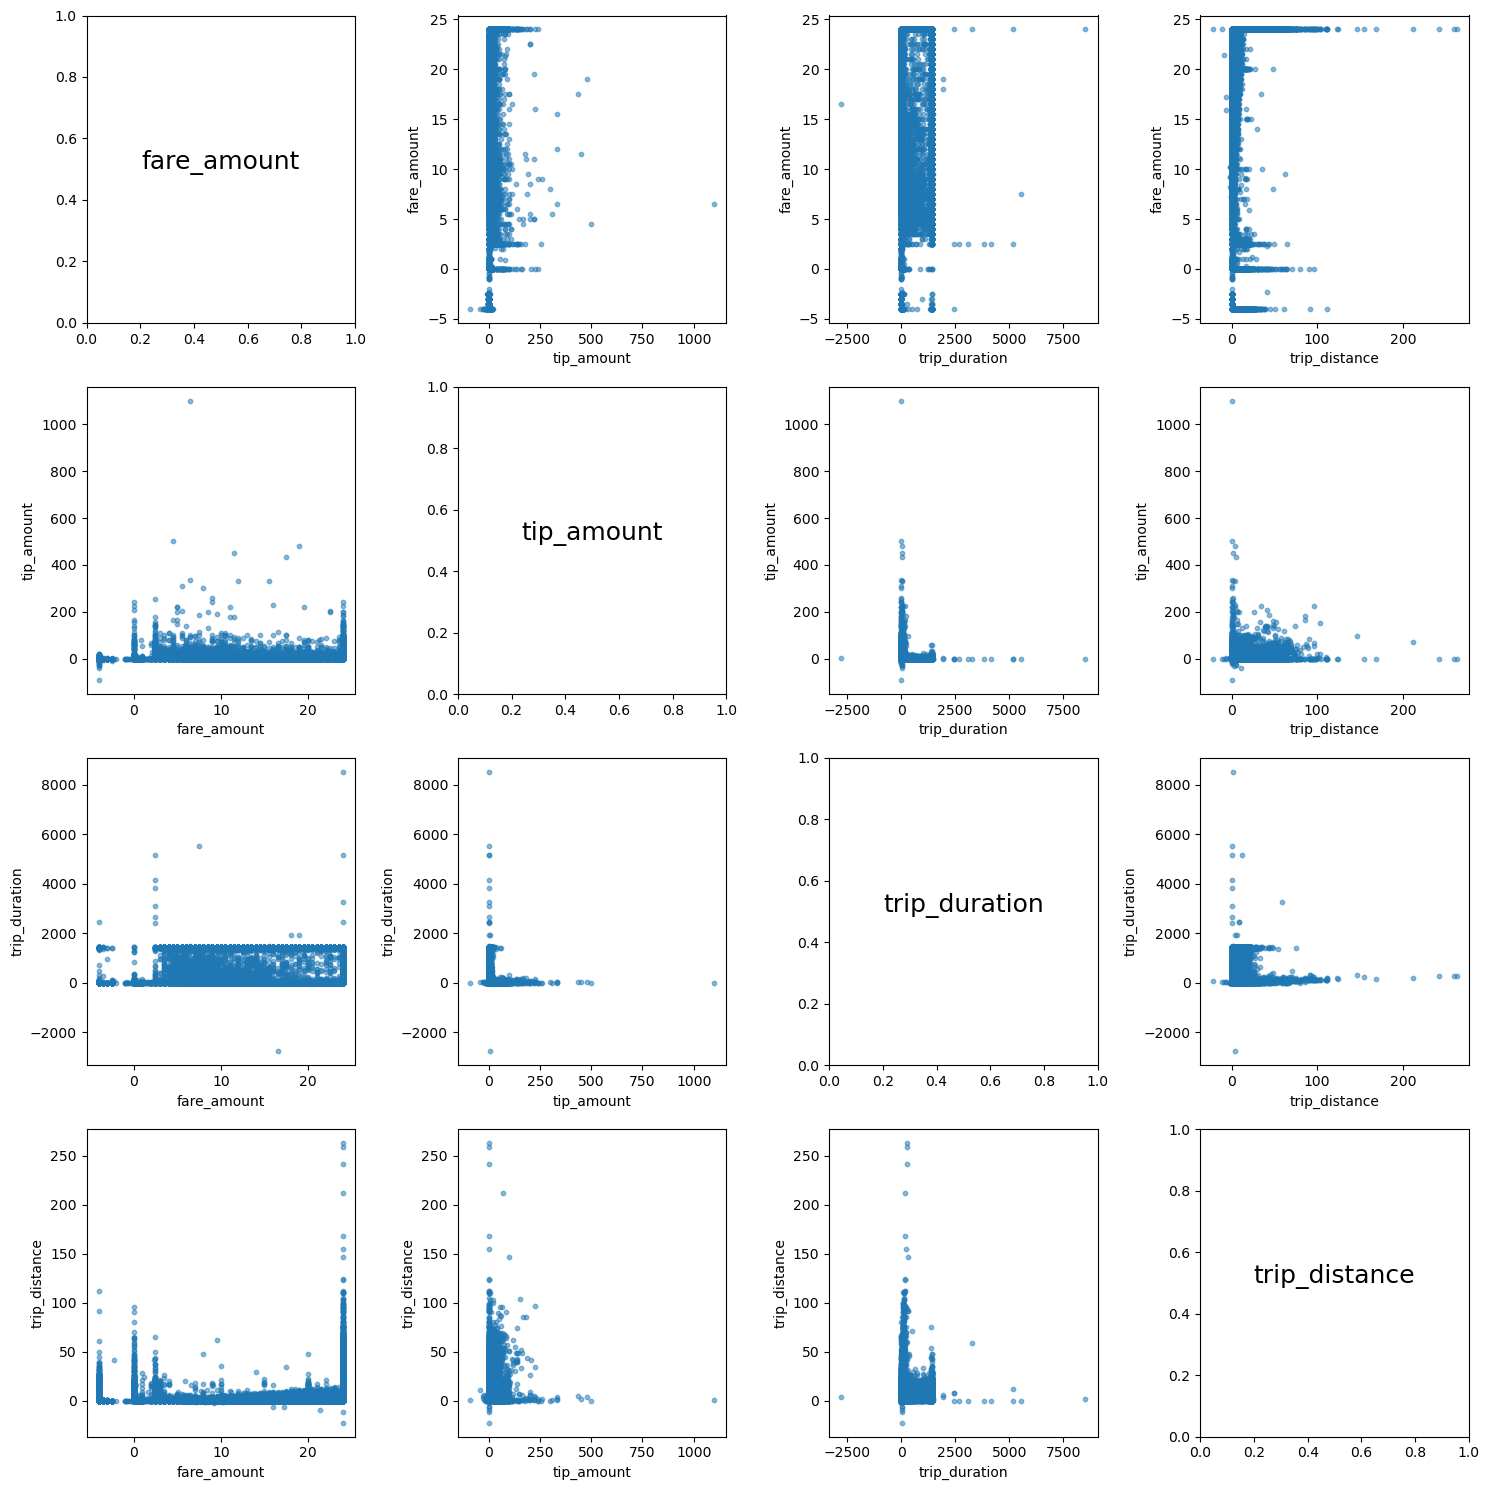

In [55]:
variables = ['fare_amount', 'tip_amount', 'trip_duration', 'trip_distance']
n_vars = len(variables)

fig, axs = plt.subplots(n_vars, n_vars, figsize=(15, 15))  # Create a grid of subplots

for i in range(n_vars):
    for j in range(n_vars):
        if i != j:
            axs[i, j].scatter(engineered_data[variables[j]], engineered_data[variables[i]], alpha=0.5, s=10)
            axs[i, j].set_xlabel(variables[j])
            axs[i, j].set_ylabel(variables[i])
        else:
            axs[i, j].text(0.5, 0.5, variables[i], fontsize=18, ha='center')

plt.tight_layout()
plt.show()

/tmp/ipykernel_62810/2189249967.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.abs(np.round(engineered_data.corr(), 2)), square=True, annot=True, cmap=plt.cm.Blues)


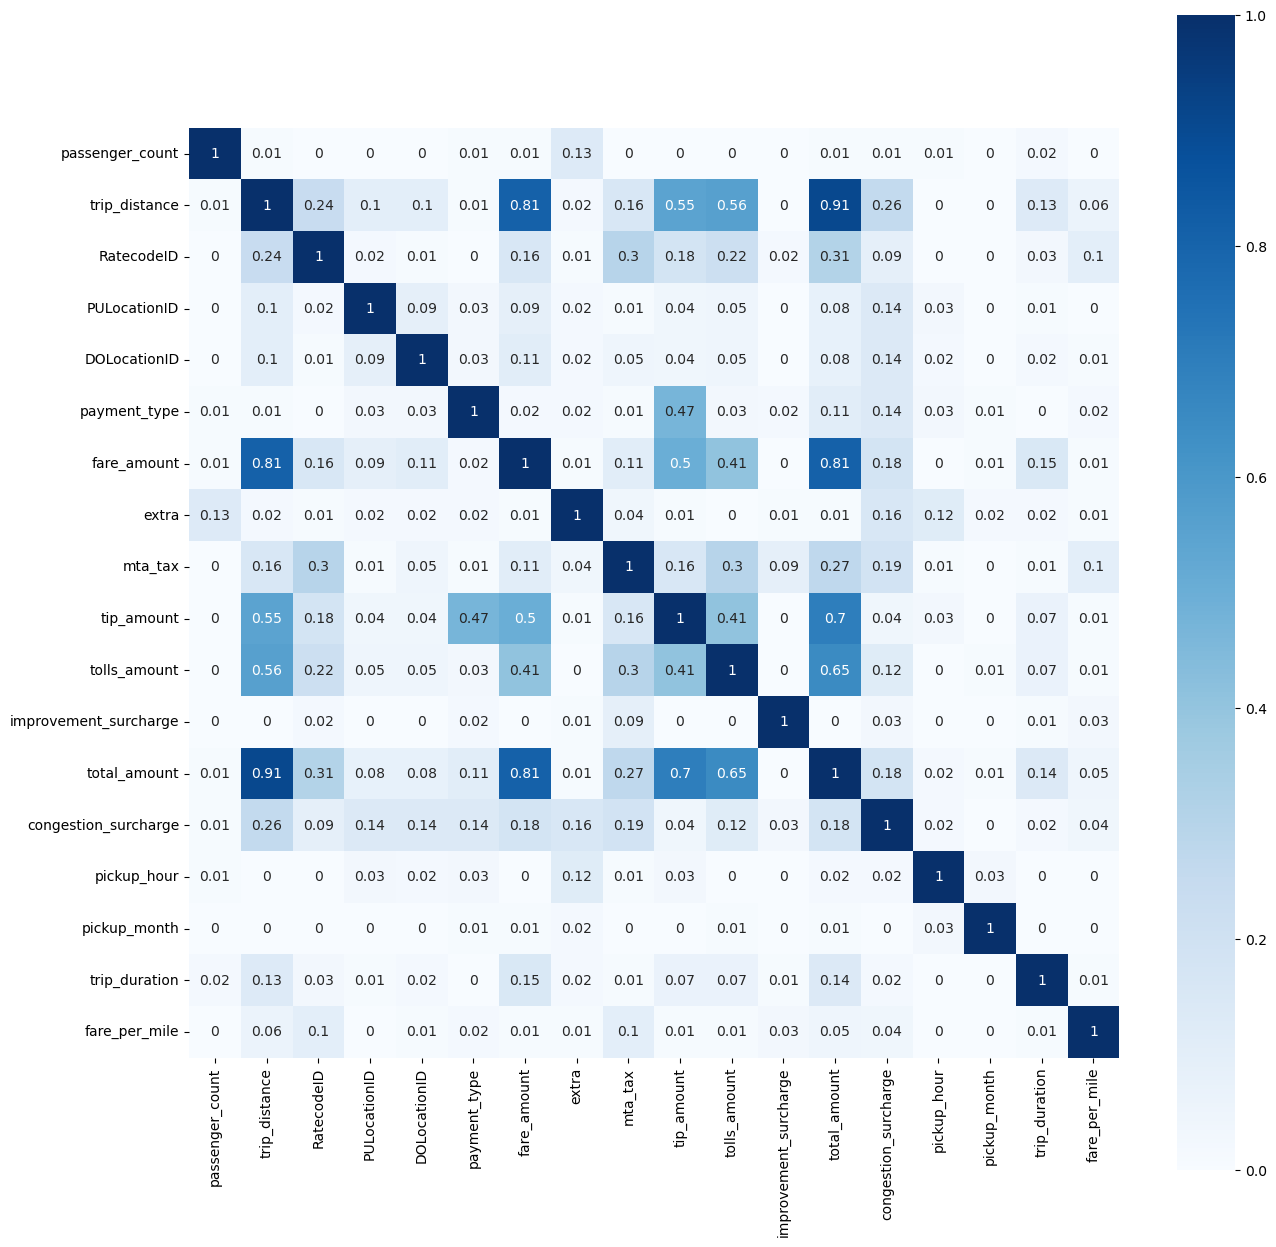

In [43]:
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(np.round(engineered_data.corr(), 2)), square=True, annot=True, cmap=plt.cm.Blues)
plt.show()

In [31]:
def apply_cyclic_encoding(df, column_name):
    """
    Apply cyclic encoding to day of the week.
    
    Args:process_data
    df (pd.DataFrame): DataFrame containing the days of the week.
    column_name (str): Name of the column containing day names.
    
    Returns:
    pd.DataFrame: DataFrame with two new columns for sin and cos encoding of the day of the week.
    """
    # Mapping days to numbers
    day_to_num = {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    }
    
    # Ensure the column exists in DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column {column_name} not found in DataFrame")
    
    # Map day names to numbers using the defined dictionary
    df['day_number'] = df[column_name].map(day_to_num)
    
    # Check for any NaNs which indicate mapping failures
    if df['day_number'].isna().any():
        missing_values = df[df['day_number'].isna()][column_name].unique()
        raise ValueError(f"Mapping not found for: {missing_values}. Check day names or mapping dictionary.")

    # Apply cyclic encoding
    df['day_sin'] = np.sin(2 * np.pi * df['day_number'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_number'] / 7)

    # Optionally, remove the 'day_number' column if not needed
    df.drop('day_number', axis=1, inplace=True)
    
    return df


In [32]:
# Apply cyclic encoding
engineered_data = apply_cyclic_encoding(engineered_data, 'pickup_day_of_week')

In [33]:
engineered_data.head(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day_of_week,pickup_month,trip_duration,fare_per_mile,day_sin,day_cos
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,...,0.3,11.27,2.5,0,Wednesday,1,4.800000,5.000000,0.974928,-0.222521
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,...,0.3,12.30,2.5,0,Wednesday,1,7.416667,5.833333,0.974928,-0.222521
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,...,0.3,10.80,2.5,0,Wednesday,1,6.183333,10.000000,0.974928,-0.222521
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,...,0.3,8.16,0.0,0,Wednesday,1,4.850000,6.875000,0.974928,-0.222521
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,...,0.3,4.80,0.0,0,Wednesday,1,2.300000,0.000000,0.974928,-0.222521


In [34]:
engineered_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month', 'trip_duration', 'fare_per_mile',
       'day_sin', 'day_cos'],
      dtype='object')

In [35]:
## For Fare Prediction Feature Selection

In [36]:
fare_prediction_columns = [
    'VendorID',
    'passenger_count',
    'trip_distance',
    'RatecodeID',
    'store_and_fwd_flag',
    'PULocationID',
    'DOLocationID',
    'trip_duration',
    'congestion_surcharge',
    'pickup_hour',
    'day_sin',  
    'day_cos',  
    'pickup_month',
    'fare_amount' # class label
]

In [37]:
fare_prediction_df = engineered_data[fare_prediction_columns]

In [38]:
categorical_vars = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID']

# Compute the number of unique values for each categorical column
unique_counts = {var: df[var].nunique() for var in categorical_vars}

# Print the number of unique values for each categorical variable
print(unique_counts)

{'VendorID': 4, 'RatecodeID': 7, 'store_and_fwd_flag': 2, 'PULocationID': 260, 'DOLocationID': 262}


In [39]:
fare_prediction_df['VendorID'] = fare_prediction_df['VendorID'].astype(int).astype(str)

/tmp/ipykernel_6803/922428543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare_prediction_df['VendorID'] = fare_prediction_df['VendorID'].astype(int).astype(str)


In [59]:
# Calculate mean fare and count of trips for Pickup Locations
pu_mean_fares = fare_prediction_df.groupby('PULocationID')['fare_amount'].agg(['mean', 'count']).reset_index()

# Calculate mean fare and count of trips for Dropoff Locations
do_mean_fares = fare_prediction_df.groupby('DOLocationID')['fare_amount'].agg(['mean', 'count']).reset_index()

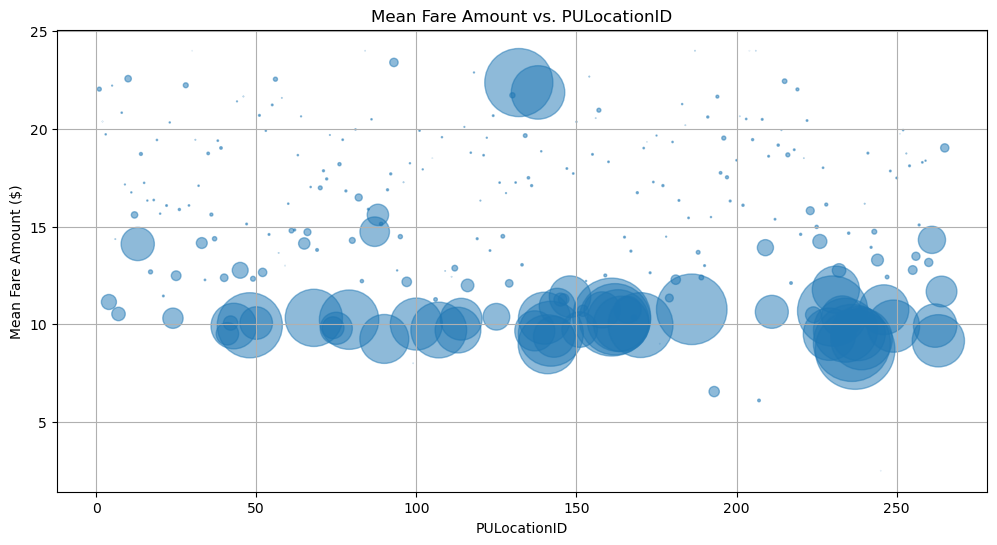

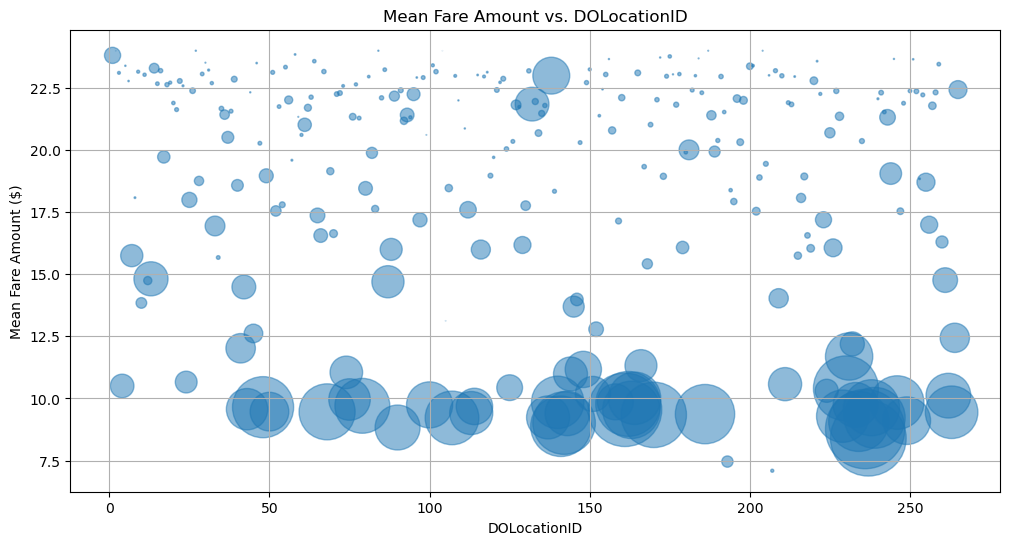

In [61]:
# Plot for Pickup Locations
plt.figure(figsize=(12, 6))
plt.scatter(pu_mean_fares['PULocationID'], pu_mean_fares['mean'], s=pu_mean_fares['count']/100, alpha=0.5)
plt.title('Mean Fare Amount vs. PULocationID')
plt.xlabel('PULocationID')
plt.ylabel('Mean Fare Amount ($)')
plt.grid(True)
plt.show()

# Plot for Dropoff Locations
plt.figure(figsize=(12, 6))
plt.scatter(do_mean_fares['DOLocationID'], do_mean_fares['mean'], s=do_mean_fares['count']/100, alpha=0.5)
plt.title('Mean Fare Amount vs. DOLocationID')
plt.xlabel('DOLocationID')
plt.ylabel('Mean Fare Amount ($)')
plt.grid(True)
plt.show()

In [40]:
def encode_categorical_features(df, base_features, categorical_vars):
    """
    Prepare the DataFrame for modeling by converting specified categorical variables
    to dummy variables and compiling a complete list of features.
    
    Args:
    df (DataFrame): The input data frame.
    base_features (list): List of base feature names to be included.
    categorical_vars (list): List of categorical variable names to be one-hot encoded.

    Returns:
    DataFrame, list: The modified DataFrame and the complete list of feature names.
    """
    for var in categorical_vars:
        df[var] = df[var].astype('category')
    
    # Apply one-hot encoding to the specified categorical variables
    df = pd.get_dummies(df, columns=categorical_vars)
    
    # Initialize the feature list with the base features
    features = base_features[:]
    
    # Dynamically add features for each categorical variable
    for var in categorical_vars:
        features.extend([col for col in df.columns if col.startswith(var + '_')])
    print(features)
    return df, features

def split_data(X, y, test_size=0.3, random_state=2242):
    """
    Split the data into training and testing sets.
    :param X: Feature matrix.
    :param y: Target vector.
    :param test_size: Proportion of the dataset to include in the test split.
    :param random_state: Controls the shuffling applied to the data before applying the split.
    :return: Split data into training and testing sets.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_model(model, X_train, y_train):
    """
    Train a linear regression model.
    :param X_train: Training feature matrix.
    :param y_train: Training target vector.
    :return: Trained model.
    """
    # model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model using RMSE and R^2 score.
    :param model: Trained machine learning model.
    :param X_test: Testing feature matrix.
    :param y_test: Testing target vector.
    :return: RMSE and R^2 score.
    """
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    return rmse, r2


In [41]:
columns_to_scale = ['trip_distance', 'pickup_hour', 'pickup_month', 'PULocationID', 'DOLocationID', 'trip_duration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
fare_prediction_df[columns_to_scale] = scaler.fit_transform(fare_prediction_df[columns_to_scale])

/tmp/ipykernel_6803/1405777686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare_prediction_df[columns_to_scale] = scaler.fit_transform(fare_prediction_df[columns_to_scale])


In [42]:
base_features = ['trip_distance', 'pickup_hour', 'pickup_month', 'PULocationID', 'DOLocationID', 'trip_duration']

# Categorical variables to encode
categorical_vars = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', ] #'PULocationID', 'DOLocationID' removed due to high nunique count

# Prepare the data
fp_df, features = encode_categorical_features(fare_prediction_df, base_features, categorical_vars)

# Now you can split the data, train a model, etc., using the 'features' list
X = fp_df[features]
y = fp_df['fare_amount']

/tmp/ipykernel_6803/1042535541.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].astype('category')
/tmp/ipykernel_6803/1042535541.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].astype('category')
/tmp/ipykernel_6803/1042535541.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

['trip_distance', 'pickup_hour', 'pickup_month', 'PULocationID', 'DOLocationID', 'trip_duration', 'VendorID_1', 'VendorID_2', 'RatecodeID_1.0', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0', 'RatecodeID_99.0', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y']


In [43]:
X.head(10)

,trip_distance,pickup_hour,pickup_month,PULocationID,DOLocationID,trip_duration,VendorID_1,VendorID_2,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,-0.439147,-2.334648,-0.363348,1.115562,1.088392,-0.172854,1,0,1,0,0,0,0,0,0,1,0
1,-0.439147,-2.334648,-0.363348,1.130834,1.074068,-0.131584,1,0,1,0,0,0,0,0,0,1,0
2,-0.599510,-2.334648,-0.363348,1.115562,1.074068,-0.151036,1,0,1,0,0,0,0,0,0,1,0
3,-0.546056,-2.334648,-0.363348,1.115562,-0.172091,-0.172065,1,0,1,0,0,0,0,0,0,1,0
4,-0.759873,-2.334648,-0.363348,0.428303,0.429503,-0.212284,0,1,1,0,0,0,0,0,0,1,0
5,-0.751855,-2.334648,-0.363348,-2.412368,0.429503,-0.234628,0,1,1,0,0,0,0,0,0,1,0
6,-0.759873,-2.334648,-0.363348,0.428303,0.429503,-0.247508,0,1,1,0,0,0,0,0,0,1,0
7,-0.759873,0.196211,33.243033,0.428303,0.429503,-0.230159,0,1,0,0,0,0,1,0,0,1,0
8,-0.759873,0.196211,33.243033,0.428303,0.429503,-0.232788,0,1,1,0,0,0,0,0,0,1,0
9,-0.572783,-2.334648,-0.363348,1.237741,-1.647429,-0.067970,1,0,1,0,0,0,0,0,0,1,0


In [44]:
len(X)

7193488

In [45]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [46]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


# # Example dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Training different models
# print('/n ridge_model')
# ridge_model = Ridge(alpha=1.0)
# ridge_model = train_model(ridge_model, X_train, y_train)
# ridge_predictions = evaluate_model(ridge_model, X_test, y_test)

# print('/n RandomForestRegressor')
# forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
# forest_model = train_model(forest_model, X_train, y_train)
# forest_predictions = evaluate_model(forest_model, X_test, y_test)

# print('/n GradientBoostingRegressor')
# gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# gbm_model = train_model(gbm_model, X_train, y_train)
# gbm_predictions = evaluate_model(gbm_model, X_test, y_test)

# print('/n svr_model')
# svr_model = SVR(kernel='linear') # The kernel type can be 'linear', 'poly', 'rbf', etc.
# svr_model = train_model(svr_model, X_train, y_train)
# svr_predictions = evaluate_model(svr_model, X_test, y_test)

# print('/n MLPRegressor')
# nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
# nn_model = train_model(nn_model, X_train, y_train)
# nn_predictions = evaluate_model(nn_model, X_test, y_test)

# print('/n DecisionTreeRegressor')
# tree_model = DecisionTreeRegressor(max_depth=5)
# tree_model = train_model(tree_model, X_train, y_train)
# tree_predictions = evaluate_model(tree_model, X_test, y_test)

In [47]:
#linear Regression training

# X_train, X_test, y_train, y_test = split_data(X, y)

# Train model
model = LinearRegression()
model = train_model(model, X_train, y_train)

# Evaluate model
rmse, r2 = evaluate_model(model, X_test, y_test)

# Print results
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 5.768109042207913
R^2 Score: 0.7719809000243423
Root Mean Squared Error: 5.768109042207913
R^2 Score: 0.7719809000243423


In [52]:
len(X_train)

5035441

In [51]:
X.to_csv('ms_iba/resources/training_features_data1.csv')

In [53]:
X.head(10)

,trip_distance,pickup_hour,pickup_month,PULocationID,DOLocationID,trip_duration,VendorID_1,VendorID_2,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,-0.439147,-2.334648,-0.363348,1.115562,1.088392,-0.172854,1,0,1,0,0,0,0,0,0,1,0
1,-0.439147,-2.334648,-0.363348,1.130834,1.074068,-0.131584,1,0,1,0,0,0,0,0,0,1,0
2,-0.599510,-2.334648,-0.363348,1.115562,1.074068,-0.151036,1,0,1,0,0,0,0,0,0,1,0
3,-0.546056,-2.334648,-0.363348,1.115562,-0.172091,-0.172065,1,0,1,0,0,0,0,0,0,1,0
4,-0.759873,-2.334648,-0.363348,0.428303,0.429503,-0.212284,0,1,1,0,0,0,0,0,0,1,0
5,-0.751855,-2.334648,-0.363348,-2.412368,0.429503,-0.234628,0,1,1,0,0,0,0,0,0,1,0
6,-0.759873,-2.334648,-0.363348,0.428303,0.429503,-0.247508,0,1,1,0,0,0,0,0,0,1,0
7,-0.759873,0.196211,33.243033,0.428303,0.429503,-0.230159,0,1,0,0,0,0,1,0,0,1,0
8,-0.759873,0.196211,33.243033,0.428303,0.429503,-0.232788,0,1,1,0,0,0,0,0,0,1,0
9,-0.572783,-2.334648,-0.363348,1.237741,-1.647429,-0.067970,1,0,1,0,0,0,0,0,0,1,0


In [62]:
## MLFLOW experiments

In [48]:
import mlflow

# Set the tracking URI to a local folder or a remote server
mlflow.set_tracking_uri('http://mlflow_server:5000')  # Replace with your path or URI

# Set the experiment name
mlflow.set_experiment('Fare_Prediction')

<Experiment: artifact_location='s3://mlflow/1', creation_time=1717225256300, experiment_id='1', last_update_time=1717225256300, lifecycle_stage='active', name='Fare_Prediction', tags={}>

In [59]:
from sklearn.model_selection import GridSearchCV
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def train_and_tune_with_mlflow(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    """
    Train the model with hyperparameter tuning, predict, and log the experiment to MLflow.

    Args:
    model (estimator): The base model to train.
    param_grid (dict): Dictionary with parameters names (`str`) as keys and lists of parameter settings to try as values.
    X_train, y_train: Training data.
    X_test, y_test: Testing data.
    model_name (str): Name of the model for tracking.
    """
    with mlflow.start_run():
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
        grid_search.fit(X_train, y_train)
        
        # Best model
        best_model = grid_search.best_estimator_
        
        # Predict on the testing set
        y_pred = best_model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Log parameters and metrics
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric('rmse', rmse)
        mlflow.log_metric('r2', r2)
        
        # Log the model
        mlflow.sklearn.log_model(best_model, model_name)

        print(f'Logged {model_name}: Best Params={grid_search.best_params_}, RMSE={rmse}, R2={r2}')
        
        return best_model, grid_search.best_params_


In [63]:
# Example for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # This is only available if you're using scikit-learn 0.24 or newer
}

# Example for Ridge Regression
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0]
}

# Hyperparameters for Gradient Boosting Regressor
param_grid_gbm = {
    'n_estimators': [50], #[50, 100, 200],
    'learning_rate': [0.01], #[0.01, 0.1, 0.2],
    'max_depth': [3], #[3, 5, 7]
}

# Hyperparameters for Decision Tree Regressor
param_grid_tree = {
    'max_depth': [3], #[3, 5, 10],
    'min_samples_split': [2], #[2, 5, 10]
}

# Hyperparameters for MLP Regressor
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['tanh', 'relu'],
    'max_iter': [200, 500]
}

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10]
}


In [72]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Train and tune with LinearRegression
best_model_lr, best_params_lr = train_and_tune_with_mlflow(LinearRegression(), param_grid_lr, X_train, y_train, X_test, y_test, 'Linear_Regression')

# Train and tune with Ridge
best_model_rg, best_params_rg = train_and_tune_with_mlflow(Ridge(), param_grid_ridge, X_train, y_train, X_test, y_test, 'Ridge_Regression')

# # Train and tune with Gradient Boosting
best_model_gbr, best_params_gbr = train_and_tune_with_mlflow(GradientBoostingRegressor(random_state=42), param_grid_gbm, X_train, y_train, X_test, y_test, 'GradientBoostingRegressor')

# # Train and tune with Decision Tree
best_model_dtr, best_params_dtr = train_and_tune_with_mlflow(DecisionTreeRegressor(random_state=42), param_grid_tree, X_train, y_train, X_test, y_test, 'DecisionTreeRegressor')

# # Train and tune with MLP
best_model_mlp, best_params_mlp = train_and_tune_with_mlflow(MLPRegressor(random_state=42), param_grid_mlp, X_train, y_train, X_test, y_test, 'MLPRegressor')

# Train and tune with RandomForestRegressor
best_model_rfr, best_params_rfr = train_and_tune_with_mlflow(RandomForestRegressor(random_state=456), param_grid_rf, X_train, y_train, X_test, y_test, 'RandomForestRegressor')


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logged Linear_Regression: Best Params={'fit_intercept': False, 'positive': False}, RMSE=3.3886737429989533, R2=0.6802725614492022
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logged Ridge_Regression: Best Params={'alpha': 1.0}, RMSE=3.3886704298583266, R2=0.6802731866504041


In [61]:
# Train and tune with Gradient Boosting
best_model_gbr, best_params_gbr = train_and_tune_with_mlflow(GradientBoostingRegressor(random_state=342), param_grid_gbm, X_train, y_train, X_test, y_test, 'GradientBoostingRegressor')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logged GradientBoostingRegressor: Best Params={'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}, RMSE=3.7946214248145558, R2=0.5990803872446151


In [62]:
# Train and tune with Decision Tree
best_model_dtr, best_params_dtr = train_and_tune_with_mlflow(DecisionTreeRegressor(random_state=75), param_grid_tree, X_train, y_train, X_test, y_test, 'DecisionTreeRegressor')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Logged DecisionTreeRegressor: Best Params={'max_depth': 3, 'min_samples_split': 2}, RMSE=1.5818027707750053, R2=0.9303333291977245


In [ ]:
# Train and tune with MLP
best_model_mlp, best_params_mlp = train_and_tune_with_mlflow(MLPRegressor(random_state=768), param_grid_mlp, X_train, y_train, X_test, y_test, 'MLPRegressor')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# Train and tune with RandomForestRegressor
best_model_rfr, best_params_rfr = train_and_tune_with_mlflow(RandomForestRegressor(random_state=456), param_grid_rf, X_train, y_train, X_test, y_test, 'RandomForestRegressor')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def train_and_predict_with_mlflow(model, X_train, y_train, X_test, y_test, model_name):
    """
    Train the model, predict, and log the experiment to MLflow.

    Args:
    model (estimator): The model to train.
    X_train, y_train: Training data.
    X_test, y_test: Testing data.
    model_name (str): Name of the model for tracking.
    """
    with mlflow.start_run():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on the testing set
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Log parameters (if any)
        params = model.get_params()
        mlflow.log_params(params)
        
        # Log metrics
        mlflow.log_metric('rmse', rmse)
        mlflow.log_metric('r2', r2)
        
        # Log the model
        mlflow.sklearn.log_model(model, model_name)

        print(f'Logged {model_name}: RMSE={rmse}, R2={r2}')

        return y_pred


In [49]:
import mlflow
from mlflow import sklearn as mlflow_sklearn
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def train_and_predict_with_mlflow(model, X_train, y_train, X_test, y_test, model_name, model_tags=None, register_model=False):
    """
    Train the model, predict, evaluate, and log the experiment to MLflow with optional tagging and model registration.

    Args:
        model (estimator): The model to train.
        X_train, y_train (DataFrame, Series): Training data.
        X_test, y_test (DataFrame, Series): Testing data.
        model_name (str): Name of the model for tracking.
        model_tags (dict, optional): Tags to add to the MLflow run.
        register_model (bool, optional): Whether to register the model in MLflow Model Registry.
    """
    with mlflow.start_run():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on the testing set
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Log parameters, metrics, and model
        params = model.get_params()
        mlflow.log_params(params)
        mlflow.log_metric('rmse', rmse)
        mlflow.log_metric('r2', r2)
        
        # Log the model
        mlflow_sklearn.log_model(model, model_name)
        
        # Add tags if provided
        if model_tags:
            mlflow.set_tags(model_tags)
        
        print(f'Logged {model_name}: RMSE={rmse}, R2={r2}')
        
        # Register the model if flagged to do so
        if register_model:
            mlflow.sklearn.log_model(model, model_name, registered_model_name=model_name)
        
        return y_pred


In [65]:
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
model_name = 'MLPRegressorModel'
model_tags = {
    "model_type": "MLPRegressor"
}

train_and_predict_with_mlflow(nn_model, X_train, y_train, X_test, y_test, model_name, model_tags=model_tags, register_model=True)

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logged MLPRegressorModel: RMSE=0.3295768295759648, R2=0.992941878692083


Successfully registered model 'MLPRegressorModel'.
2024/06/10 13:34:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: MLPRegressorModel, version 1
Created version '1' of model 'MLPRegressorModel'.


array([ 8.17379642, 18.43544996,  6.22998861, ...,  7.11772281,
        4.34509409,  4.08184193])

In [ ]:
model = RandomForestRegressor()
model_name = "RandomForest_Regressor"
model_tags = {
    "feature_set": "basic_features",
    "experiment_type": "initial_test"
}

# Train, predict, and log with MLflow
predictions = train_and_predict_with_mlflow(model, X_train, y_train, X_test, y_test, model_name, model_tags=model_tags, register_model=True)


In [81]:
gbm_model = GradientBoostingRegressor(n_estimators=110, learning_rate=0.01, max_depth=3, random_state=1213)
model_name = "GradientBoostingRegressorModel"
model_tags = {
    "model_type": "GradientBoostingRegressorModel"
}
train_and_predict_with_mlflow(gbm_model, X_train, y_train, X_test, y_test, model_name, model_tags=model_tags, register_model=True)

Logged GradientBoostingRegressorModel: RMSE=1.2922473143340851, R2=0.8579586933189183


Successfully registered model 'GradientBoostingRegressorModel'.
2024/06/11 06:31:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: GradientBoostingRegressorModel, version 1
Created version '1' of model 'GradientBoostingRegressorModel'.


array([ 8.23900662, 12.71552848,  7.13356113, ...,  7.63227978,
        5.99886212,  5.79930189])

In [71]:
ridge_model = Ridge(alpha=1.0)
model_name = "Ridge_RegressionModel"
model_tags = {
    "model_type": "Ridge_Regression"
}
train_and_predict_with_mlflow(ridge_model, X_train, y_train, X_test, y_test, model_name, model_tags=model_tags, register_model=True)

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logged Ridge_RegressionModel: RMSE=1.5530028000725482, R2=0.7948517295571063


Successfully registered model 'Ridge_RegressionModel'.
2024/06/11 05:32:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge_RegressionModel, version 1
Created version '1' of model 'Ridge_RegressionModel'.


array([ 8.39575144, 18.25833598,  6.53858998, ...,  8.0525025 ,
        5.51158825,  5.18806779])

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
train_and_predict_with_mlflow(ridge_model, X_train, y_train, X_test, y_test, 'Ridge_Regression')

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logged Ridge_Regression: RMSE=3.687940409068477, R2=0.6353628281709652


array([ 8.56293675, 11.81281133,  8.53308376, ...,  7.60829172,
        7.44070844,  9.30807563])

In [50]:
max_depth = 500
min_samples_split = 20
tree_model = DecisionTreeRegressor(max_depth=max_depth,min_samples_split=min_samples_split)
model_name = "DecisionTreeRegressorModel"
model_tags = {
    "model_type": "DecisionTreeRegressorModel","max_depth": max_depth ,"min_samples_split": min_samples_split
    
}

predictions = train_and_predict_with_mlflow(tree_model, X_train, y_train, X_test, y_test, model_name, model_tags=model_tags, register_model=True)

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logged DecisionTreeRegressorModel: RMSE=5.121613216653818, R2=0.8202297350474688


Registered model 'DecisionTreeRegressorModel' already exists. Creating a new version of this model...
2024/06/24 08:11:40 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTreeRegressorModel, version 24
Created version '24' of model 'DecisionTreeRegressorModel'.


In [51]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor

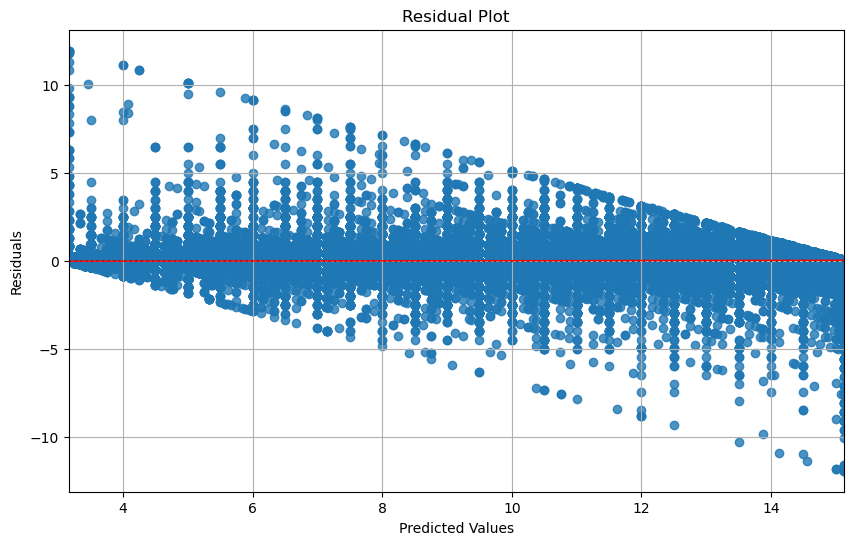

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `predictions` and `y_test` are available
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


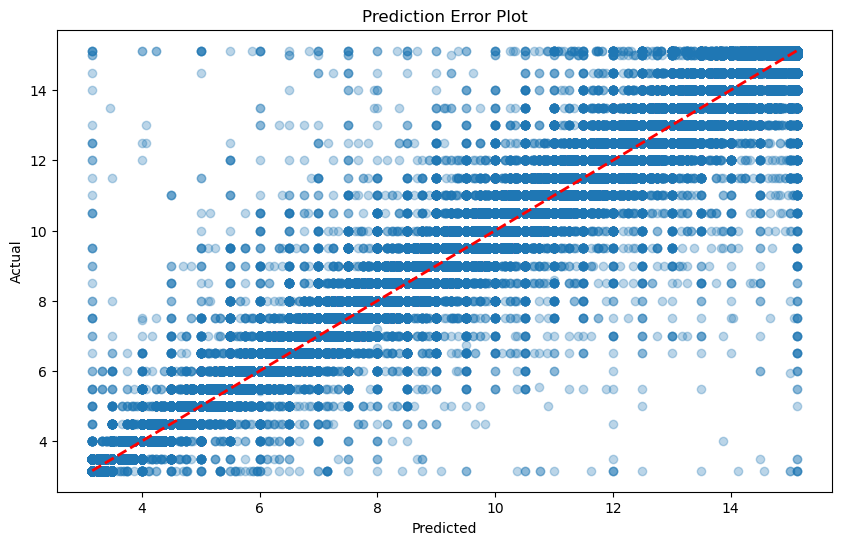

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions, y_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Prediction Error Plot')
plt.show()


In [72]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2}')
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error: {rmse}")


R² Score: 0.9891084039909488
Root Mean Squared Error: 0.3578360332611388


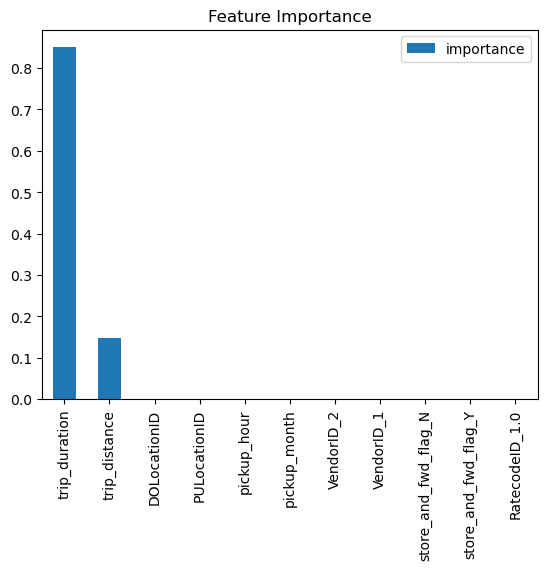

In [66]:
feature_importances = pd.DataFrame(tree_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


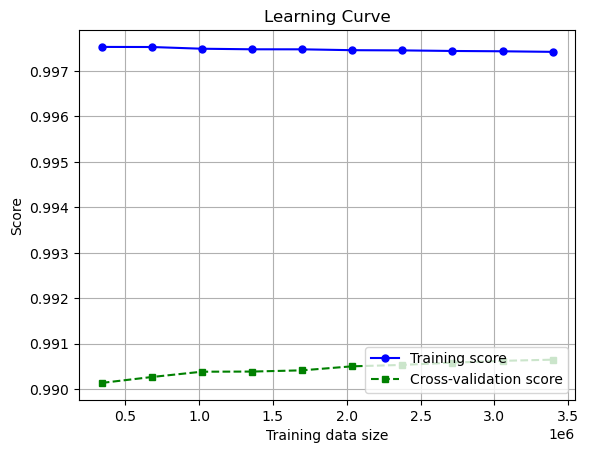

In [67]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=tree_model,
                                                        X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training data size')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [53]:
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
train_and_predict_with_mlflow(gbm_model, X_train, y_train, X_test, y_test, 'GradientBoostingRegressor')


Logged GradientBoostingRegressor: RMSE=1.8174478832892107, R2=0.9114441855885271


array([ 7.54222045, 15.38761911,  7.94749509, ...,  5.45201765,
        3.54251103, 10.00732798])

In [ ]:
svr_model = SVR(kernel='linear')
train_and_predict_with_mlflow(svr_model, X_train, y_train, X_test, y_test, 'SVR_linear1')


In [52]:
tree_model = DecisionTreeRegressor(max_depth=5)
train_and_predict_with_mlflow(tree_model, X_train, y_train, X_test, y_test, 'DecisionTreeRegressor')

/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logged DecisionTreeRegressor: RMSE=2.023325207051499, R2=0.8900814124041319


array([13.67354766, 10.62679771,  7.1192616 , ...,  5.28142668,
        5.28142668, 23.89564895])

In [53]:
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
train_and_predict_with_mlflow(nn_model, X_train, y_train, X_test, y_test, 'MLPRegressor')

Logged MLPRegressor: RMSE=2.011820699784104, R2=0.8913278398999224


array([14.37048741, 10.42283048,  7.500067  , ...,  4.79993329,
        5.02678419, 23.60849778])

In [ ]:
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
train_and_predict_with_mlflow(gbm_model, X_train, y_train, X_test, y_test, 'GradientBoostingRegressor')


nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
train_and_predict_with_mlflow(nn_model, X_train, y_train, X_test, y_test, 'MLPRegressor')


tree_model = DecisionTreeRegressor(max_depth=5)
train_and_predict_with_mlflow(tree_model, X_train, y_train, X_test, y_test, 'DecisionTreeRegressor')

In [98]:
X_test_subset = X_test.drop(columns=['trip_duration']).iloc[:100]
X_test_subset

,trip_distance,pickup_hour,pickup_month,PULocationID,DOLocationID,VendorID_1,VendorID_2,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,store_and_fwd_flag_N,store_and_fwd_flag_Y
1727176,-0.602039,0.194622,-0.363342,1.085094,1.047616,0,1,1,0,0,0,0,0,0,1,0
1841904,-0.215547,-2.336162,-0.363342,1.054515,1.004591,0,1,1,0,0,0,0,0,0,1,0
3107244,0.458816,-0.986410,-0.363342,1.467330,-0.027993,0,1,1,0,0,0,0,0,0,1,0
2739890,-0.748640,0.194622,-0.363342,-0.887246,-0.802431,0,1,1,0,0,0,0,0,0,1,0
6156828,-0.100932,-2.167443,2.694351,-0.260379,1.004591,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392953,0.608082,0.700779,-0.363342,-1.193036,0.015031,0,1,1,0,0,0,0,0,0,1,0
149631,-0.447442,1.206936,-0.363342,-0.382694,1.434835,1,0,1,0,0,0,0,0,0,1,0
4983216,0.605416,-0.311535,-0.363342,-1.177746,1.004591,0,1,1,0,0,0,0,0,0,1,0
2024665,-0.332827,1.375655,-0.363342,-0.260379,0.975908,0,1,1,0,0,0,0,0,0,1,0


In [104]:
y_test_subset = y_test.iloc[:100]


In [75]:
import os
os.getcwd()

'/home/jovyan/notebooks'

In [80]:
# !pip install boto3
!pip install joblib 

In [100]:
import boto3
from botocore.client import Config

# Configuration for MinIO
s3 = boto3.client('s3',
                  endpoint_url='http://172.27.0.11:9000',
                  aws_access_key_id='minioadmin',
                  aws_secret_access_key='minioadmin',
                  config=Config(signature_version='s3v4'),
                  region_name='us-east-1')

# List objects in a specific bucket
response = s3.list_objects_v2(Bucket='mlflow')

# Print all object keys in the bucket
key_list = []
for obj in response['Contents']:
    if 'pkl' in obj['Key']:
        key_list.append(obj['Key'])
        print(obj['Key'])

1/0e201b67671d49a8b1e652e3d54a37de/artifacts/DecisionTreeRegressor/model.pkl
1/713fe4e45d974dedaf391e9fb2a877fa/artifacts/GradientBoostingRegressor/model.pkl
1/76be2ee9b73b4f4aa28eeda09646f55a/artifacts/Ridge_Regression/model.pkl
1/7f94f5f204384682a500e8cf29b2a7db/artifacts/MLPRegressor/model.pkl


In [85]:
import boto3
from botocore.client import Config

# Configure MinIO credentials and endpoint
s3 = boto3.client('s3',
                  endpoint_url='http://172.27.0.11:9000',  # Default MinIO port
                  aws_access_key_id='minioadmin',  # Default MinIO access key
                  aws_secret_access_key='minioadmin',  # Default MinIO secret key
                  config=Config(signature_version='s3v4'),
                  region_name='us-east-1')

# Bucket and object key
bucket_name = 'mlflow'
object_key = '1/0e201b67671d49a8b1e652e3d54a37de/artifacts/DecisionTreeRegressor/model.pkl'

In [86]:
from io import BytesIO
import joblib

# Create a buffer
model_buffer = BytesIO()

# Download the object using Boto3
s3.download_fileobj(Bucket=bucket_name, Key=object_key, Fileobj=model_buffer)

# Seek to the start of the file
model_buffer.seek(0)

# Load the model from the buffer
model = joblib.load(model_buffer)

In [105]:
# for list of obkect keys
for object_key in key_list:
    s3.download_fileobj(Bucket=bucket_name, Key=object_key, Fileobj=model_buffer)
    
    # Seek to the start of the file
    model_buffer.seek(0)
    print('*****************' + object_key + '**************************')
    # Load the model from the buffer
    model = joblib.load(model_buffer)
    predictions = model.predict(X_test_subset)
    print(predictions)
    print(y_test_subset - predictions)
    print('*********************************************************************************')

*****************1/0e201b67671d49a8b1e652e3d54a37de/artifacts/DecisionTreeRegressor/model.pkl**************************
[10.53169997 10.53169997  5.28142668 10.53169997 10.53169997  5.28142668
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997  5.28142668
 10.53169997 10.53169997 10.53169997 10.53169997  7.1192616  10.53169997
 10.53169997  5.28142668 10.44292225 10.53169997 10.53169997 10.53169997
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
  5.28142668 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
  5.28142668  5.28142668 10.53169997 10.53169997 10.53169997 10.53169997
 10.53169997 10.53169997 10.53169997  5.28142668 10.53169997 10.53169997
  7.1192616   5.28142668 10.53169997 10.53169997 13.18214434 10.53169997
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
 10.53169997  8.25084705  5.28142668 10.53169997  5.28142668 10.53169997
  5.

In [99]:
predictions = model.predict(X_test_subset)
print(predictions)

[10.53169997 10.53169997  5.28142668 10.53169997 10.53169997  5.28142668
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997  5.28142668
 10.53169997 10.53169997 10.53169997 10.53169997  7.1192616  10.53169997
 10.53169997  5.28142668 10.44292225 10.53169997 10.53169997 10.53169997
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
  5.28142668 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
  5.28142668  5.28142668 10.53169997 10.53169997 10.53169997 10.53169997
 10.53169997 10.53169997 10.53169997  5.28142668 10.53169997 10.53169997
  7.1192616   5.28142668 10.53169997 10.53169997 13.18214434 10.53169997
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997 10.53169997
 10.53169997  8.25084705  5.28142668 10.53169997  5.28142668 10.53169997
  5.28142668 11.85123112 10.53169997 10.53169997  5.28142668 10.53169997
 10.53169997 10.53169997 10.53169997  5.28142668  5

In [72]:
X_train['RatecodeID_1.0'].unique()

array([1], dtype=uint8)

In [3]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the space of hyperparameters to search
space = {
    'n_estimators': hp.choice('n_estimators', [100]),
    'max_depth': hp.choice('max_depth', [None, 10]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2])
}

In [ ]:
# !pip install hyperopt
import mlflow
import mlflow.sklearn
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(params):
    with mlflow.start_run():
        # Initialize model with current parameters
        model = RandomForestRegressor(**params, random_state=3542)

        # Perform cross-validation
        mse = -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3).mean()
        rmse = np.sqrt(mse)

        # Log parameters and metrics in MLflow
        mlflow.log_params(params)
        mlflow.log_metric('rmse', rmse)

        # Store all the information needed to recreate this run in MLflow
        mlflow.sklearn.log_model(model, "model")

    return {'loss': rmse, 'status': STATUS_OK, 'model': model}

# Get the best model from the trials
best_model_index = np.argmin([trial['result']['loss'] for trial in trials.trials])
best_model = trials.trials[best_model_index]['result']['model']

In [1]:
%history

%history


In [2]:
import pandas as pd

In [3]:
df2 = pd.read_csv('ms_iba/resources/2021_Yellow_Taxi_Trip_Data.csv')

/tmp/ipykernel_73119/503768753.py:1: DtypeWarning: Columns (0,6,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('ms_iba/resources/2021_Yellow_Taxi_Trip_Data.csv')


In [4]:
df2.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,3.115095e+06,3.311693e+06,3.115095e+06,3.311693e+06,3.311693e+06,3.115095e+06,3.311693e+06,3.311693e+06,3.311693e+06,3.311692e+06,3.311692e+06,3.311692e+06,3.311692e+06
mean,1.407298e+00,4.116427e+00,1.031649e+00,1.662501e+02,1.624407e+02,1.273166e+00,1.192009e+01,1.015187e+00,4.930999e-01,2.192984e-01,2.969148e-01,1.734469e+01,2.154950e+00
std,1.050341e+00,3.834639e+02,5.611866e-01,6.771614e+01,7.176794e+01,4.878452e-01,1.264422e+01,1.242185e+00,7.634288e-02,1.428788e+00,4.242158e-02,1.412726e+01,8.913865e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.310000e+02,-5.500000e+00,-5.000000e-01,-3.802000e+01,-3.000000e-01,-6.348000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.250000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00
50%,1.000000e+00,1.690000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,3.000000e-01,1.404000e+01,2.500000e+00
75%,1.000000e+00,2.960000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,0.000000e+00,3.000000e-01,1.903000e+01,2.500000e+00
max,9.000000e+00,2.631633e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.965000e+03,8.750000e+00,3.300000e+00,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00


In [5]:
len(df2)

3311697

In [13]:
df2[200000:200500].to_csv('ms_iba/resources/inference3.csv', index=False)

In [14]:
df2[2000000:2000500].to_csv('ms_iba/resources/inference4.csv', index=False)

In [29]:
df2[2000000:2000500][['tpep_pickup_datetime', 'trip_distance', 'fare_amount']] #01/01/2021 12:30:10 AM

,tpep_pickup_datetime,trip_distance,fare_amount
2000000,02/15/2021 02:31:38 PM,1.44,6.5
2000001,02/15/2021 02:46:00 PM,3.08,12.5
2000002,02/15/2021 02:07:18 PM,2.33,10.0
2000003,02/15/2021 02:46:33 PM,3.81,14.0
2000004,02/15/2021 02:01:30 PM,7.20,23.5
...,...,...,...
2000495,02/15/2021 02:55:23 PM,9.09,30.0
2000496,02/15/2021 02:38:50 PM,10.16,33.0
2000497,02/15/2021 02:07:17 PM,0.90,5.0
2000498,02/15/2021 02:22:08 PM,0.71,5.0


In [25]:
df2[2000003:]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2000003,2,02/15/2021 02:46:33 PM,02/15/2021 03:03:22 PM,1.0,3.81,1.0,N,170.0,263.0,1.0,14.0,0.0,0.5,3.46,0.0,0.3,20.76,2.5
2000004,1,02/15/2021 02:01:30 PM,02/15/2021 02:20:28 PM,1.0,7.20,1.0,N,161.0,244.0,2.0,23.5,2.5,0.5,0.0,0.0,0.3,26.80,2.5
2000005,1,02/15/2021 02:35:30 PM,02/15/2021 02:38:19 PM,3.0,0.40,1.0,N,116.0,152.0,2.0,4.0,0.0,0.5,0.0,0.0,0.3,4.80,0.0
2000006,1,02/15/2021 02:46:56 PM,02/15/2021 02:53:05 PM,1.0,1.20,1.0,N,151.0,239.0,1.0,6.5,2.5,0.5,9.0,0.0,0.3,18.80,2.5
2000007,2,02/15/2021 02:06:16 PM,02/15/2021 02:14:40 PM,1.0,2.32,1.0,N,234.0,229.0,1.0,9.5,0.0,0.5,2.56,0.0,0.3,15.36,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311692,1,03/11/2021 12:34:26 PM,03/11/2021 12:55:13 PM,1.0,8.40,4.0,N,132.0,265.0,2.0,32.5,0.0,0.5,0{,NaN,NaN,NaN,NaN
3311693,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3311694,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3311695,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
